In [3]:
import os
import sys
import nltk
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity as cs

from analysis import sentiment_bag_of_words, sentiment_tfidf, jaccard_similarity, cosine_similarity, reformat_documents
from preprocess import split_up_json, main

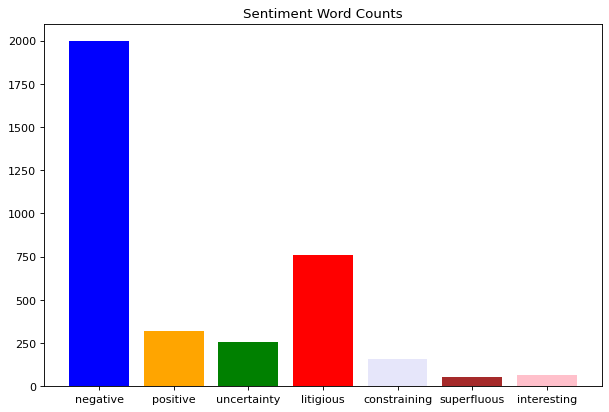

In [14]:
sentiments = pd.read_csv('supporting_data/sentiment_dataframe.csv')

counts = {}

for word in list(sentiments.columns[2:9]):
    counts[word] = len(sentiments[sentiments[word] == True])

plt.figure(figsize=(9, 6), dpi=80)
plt.bar(counts.keys(), counts.values(), color=['blue', 'orange', 'green', 'red', 'lavender', 'brown', 'pink'])
plt.title("Sentiment Word Counts")
plt.show()

[*********************100%***********************]  1 of 1 completed


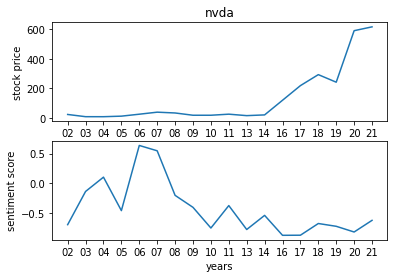

[*********************100%***********************]  1 of 1 completed


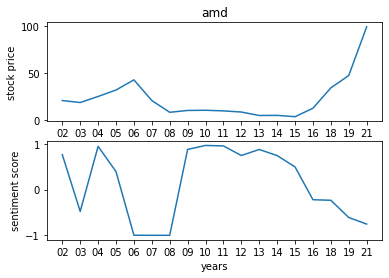

[*********************100%***********************]  1 of 1 completed


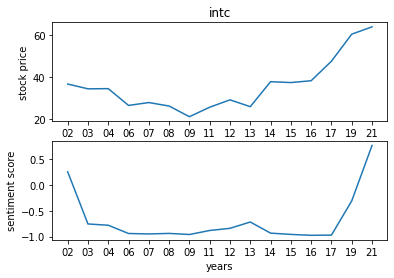

[*********************100%***********************]  1 of 1 completed


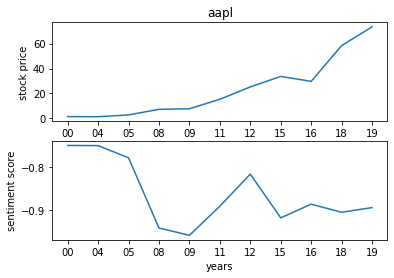

[*********************100%***********************]  1 of 1 completed


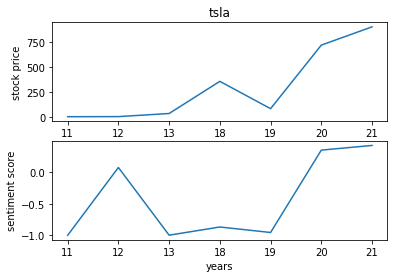

[*********************100%***********************]  1 of 1 completed


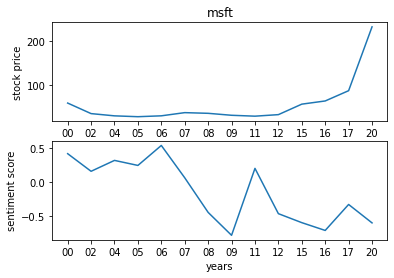

[*********************100%***********************]  1 of 1 completed


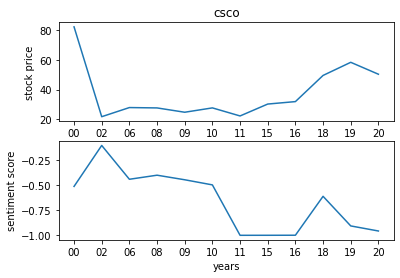

[*********************100%***********************]  1 of 1 completed


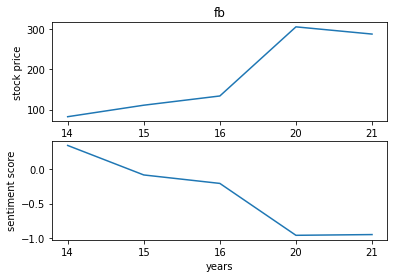

In [1]:
from analysis import sentiment_scores, sentiment_scores_test, plot_sentiment_scores


sentiment_scores_test('nvda', 'tokenized_words.json')
sentiment_scores_test('amd', 'tokenized_words.json')
sentiment_scores_test('intc', 'tokenized_words.json')
sentiment_scores_test('aapl', 'tokenized_words.json')
sentiment_scores_test('tsla', 'tokenized_words.json')
sentiment_scores_test('msft', 'tokenized_words.json')
sentiment_scores_test('csco', 'tokenized_words.json')
sentiment_scores_test('fb', 'tokenized_words.json')



In [5]:
def plot_similarities(similarities_list, ticker, save_plot=False, plot_name=None):
    if save_plot and plot_name == None:
        print("Bruh")
        return

    plt.figure(1, figsize=(10, 7))
    plt.title(ticker)
    for similarities in similarities_list.keys():
        years, sims = list(zip(*similarities_list[similarities].items()))
#         plt.title(similarities)
        plt.plot(years, sims, label=similarities)
#         plt.scatter(years, sims, label=similarities)
        plt.legend()
        plt.xticks(rotation=90)

    if save_plot:
        plt.savefig(plot_name, dpi=300)
        
    plt.show()

In [6]:
sentiments = pd.read_csv('supporting_data/sentiment_dataframe.csv')


with open('newdocs.json', 'r') as f:
    tokens = json.loads(f.read())

In [8]:
def plot_stuff(ticker):
    docs = reformat_documents(ticker, tokens)

    sbow = sentiment_bag_of_words(docs, sentiments)
    jsimilarities = jaccard_similarity(sbow)

    plot_similarities(jsimilarities, ticker, True, ticker+"_jacc")


    stfidf = sentiment_tfidf(docs, sentiments)
    csimilarities = cosine_similarity(stfidf)

    plot_similarities(csimilarities, ticker, True, ticker+"_cos")

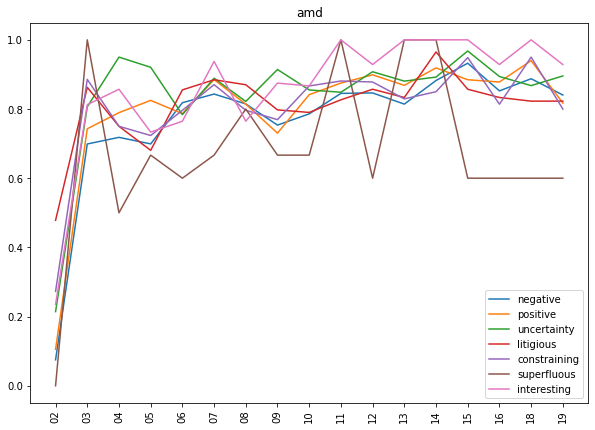

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


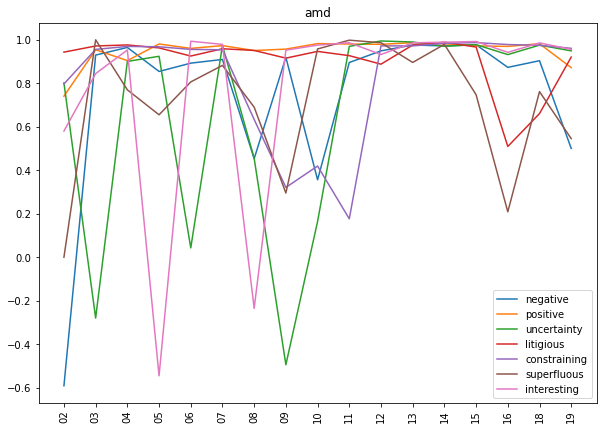

In [13]:
plot_stuff('amd')

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


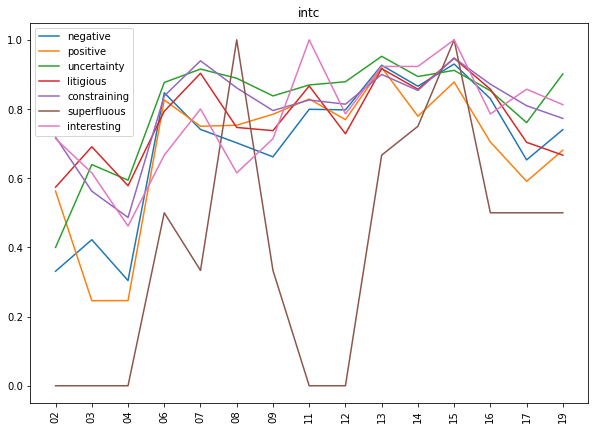

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


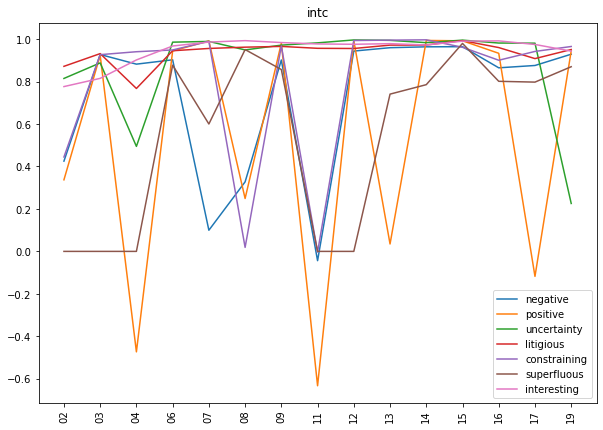

In [14]:
plot_stuff('intc')

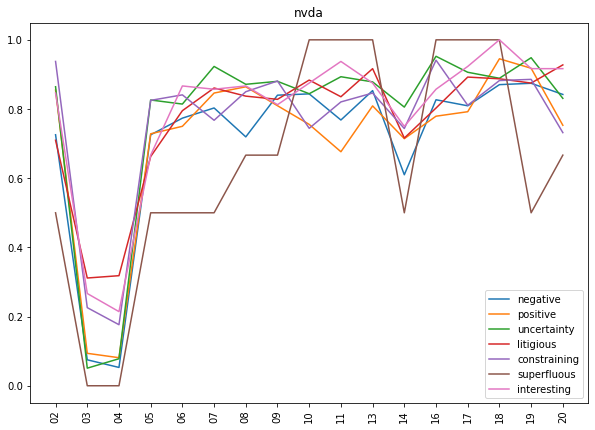

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


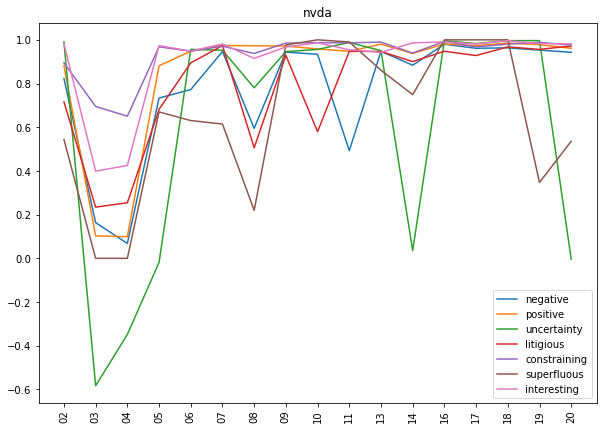

In [15]:
plot_stuff('nvda')

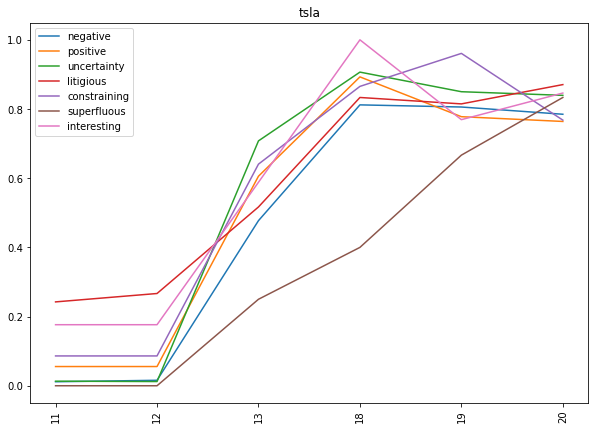

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


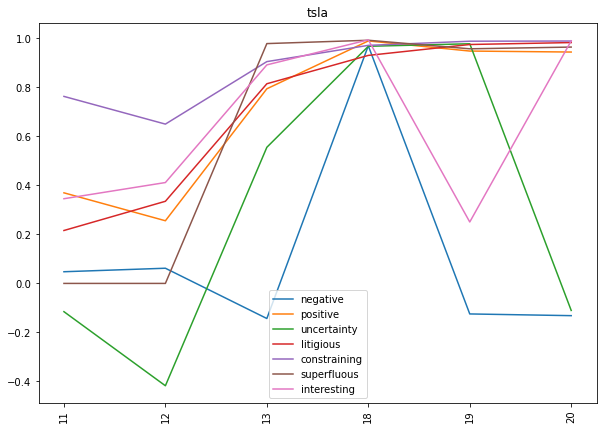

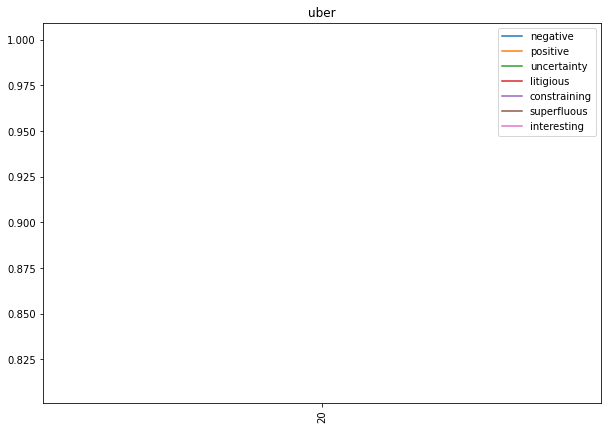

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


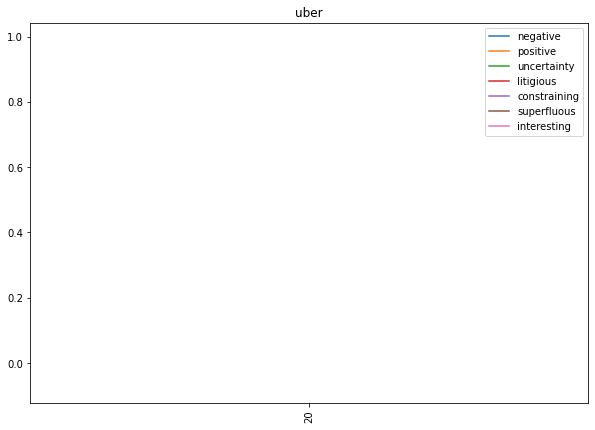

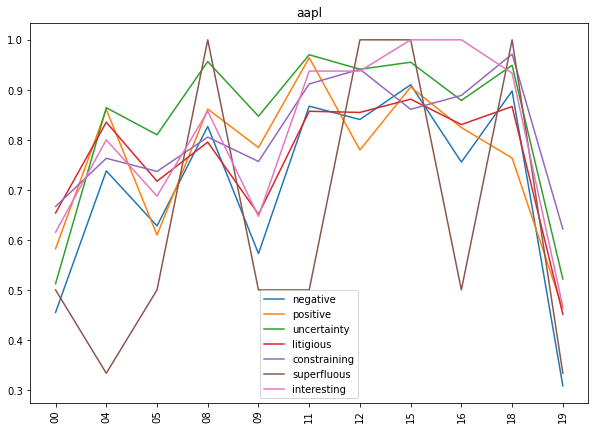

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


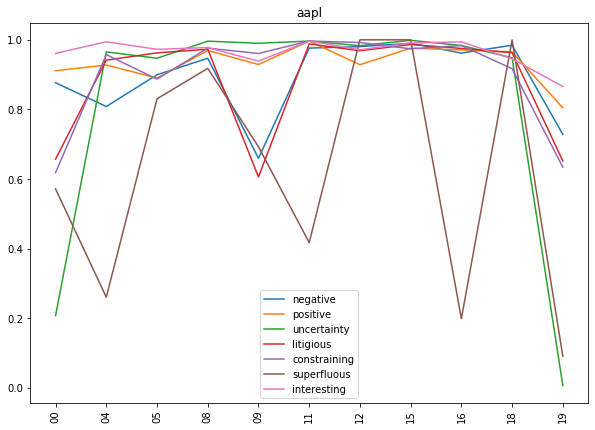

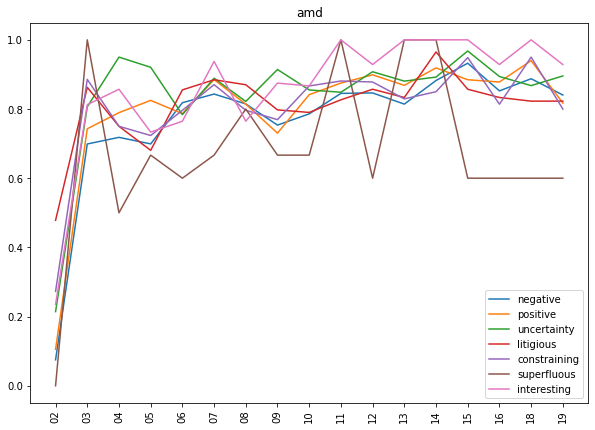

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


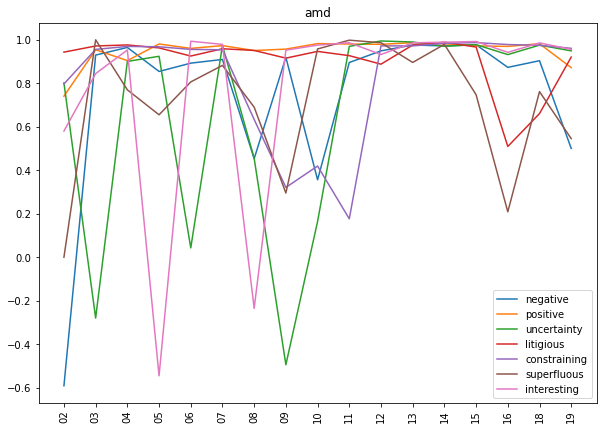

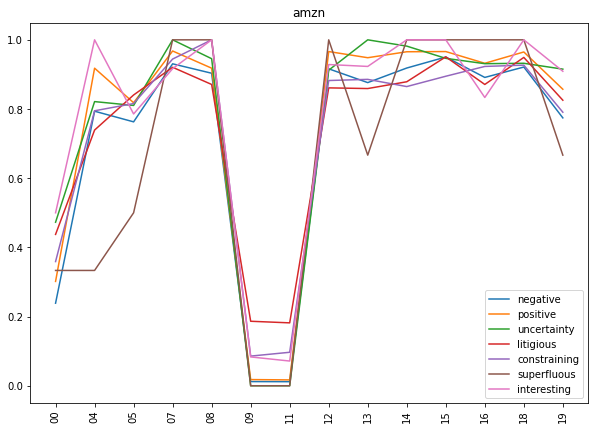

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


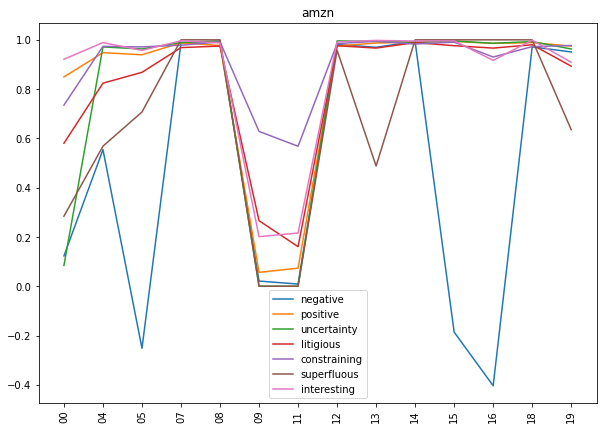

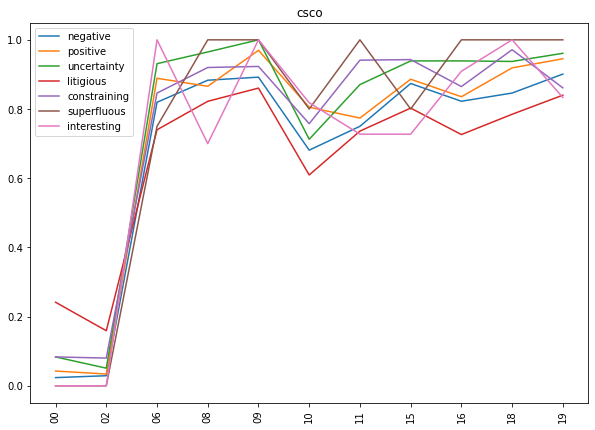

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


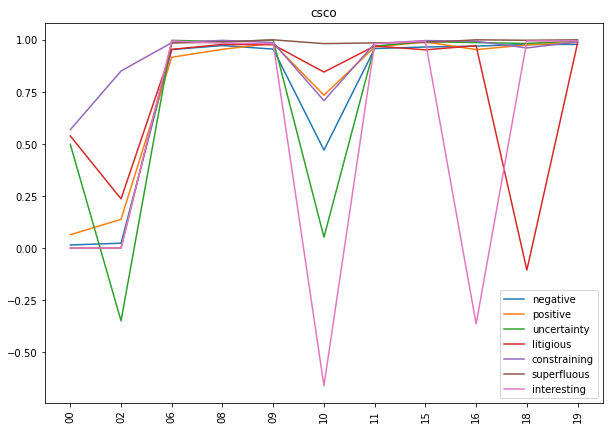

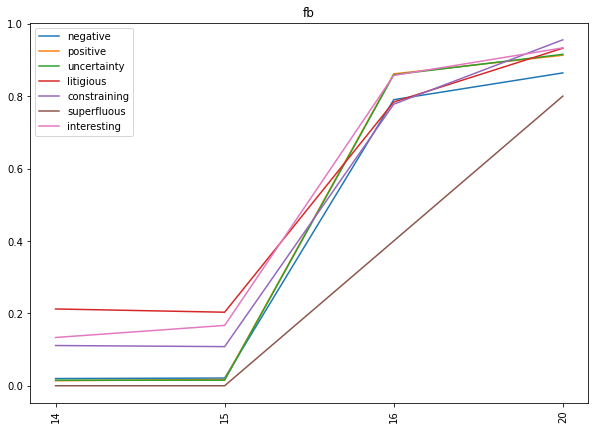

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


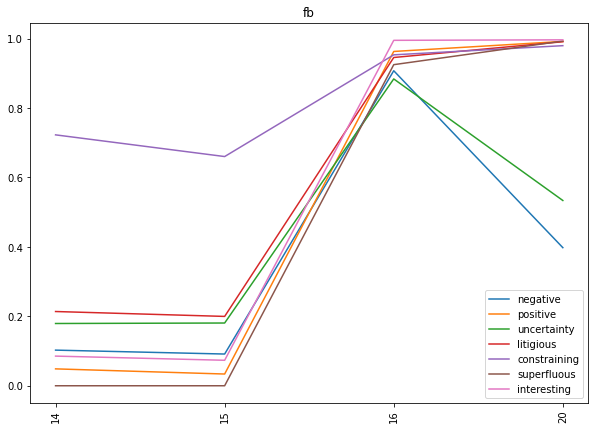

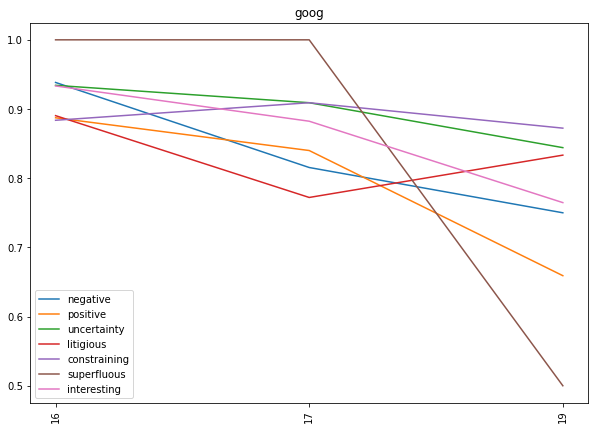

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


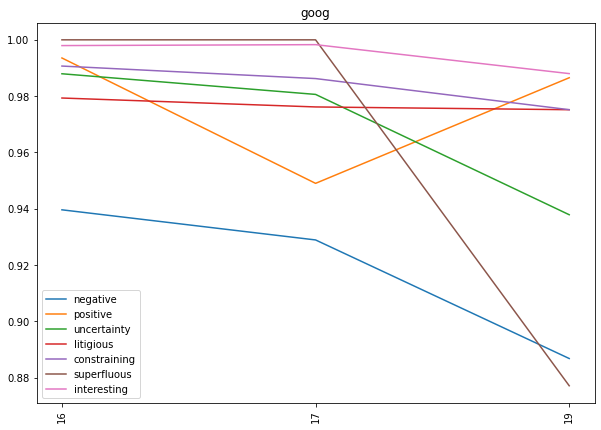

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


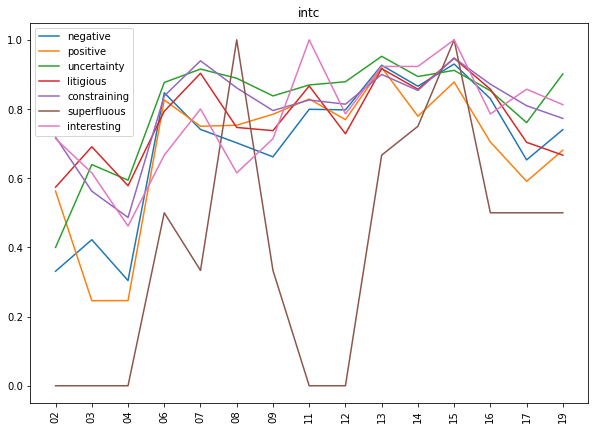

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


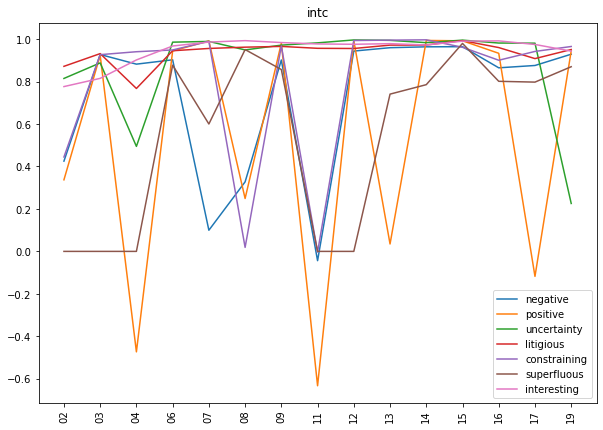

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


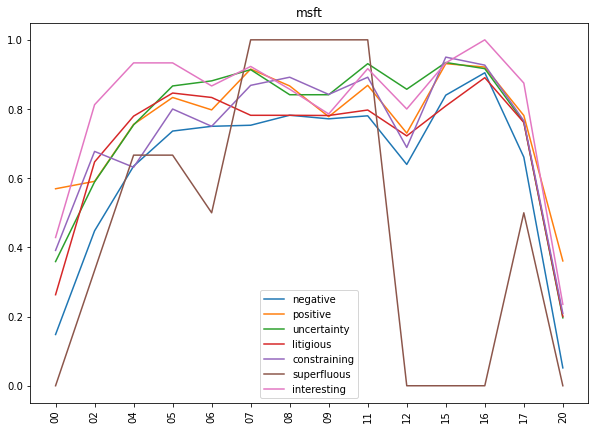

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


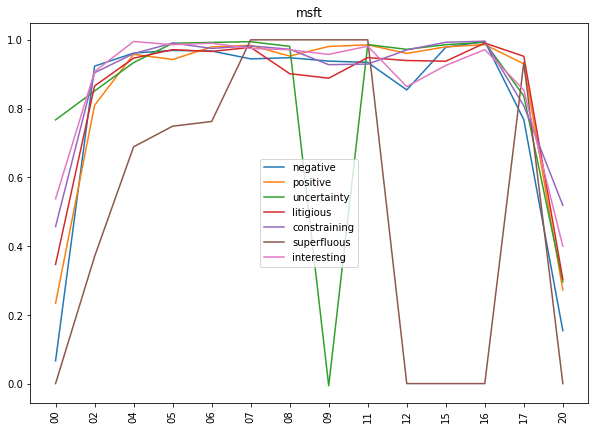

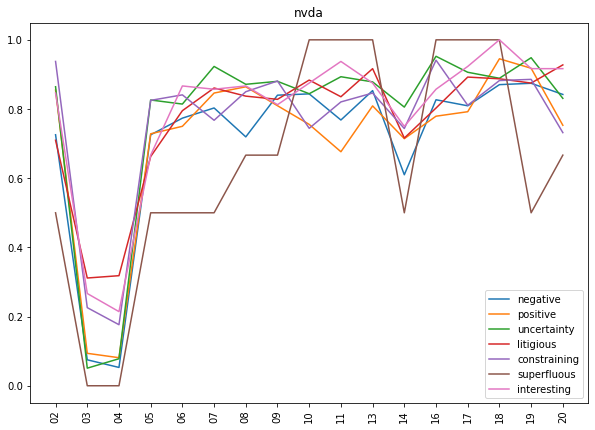

/home/christian/anaconda3/envs/csci4152/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int8'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


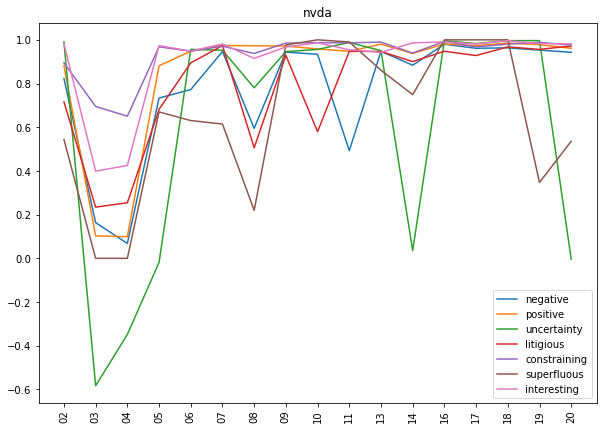

In [16]:
for ticker in tokens.keys():
    plot_stuff(ticker)